# 6. XGBOOST MODEL BUILD

In [76]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## Load Train and Test Datasets

In [33]:
df_train = pd.read_csv('../2_Modeling-Phase/train_and_test_datasets/train.csv')
df_test = pd.read_csv('../2_Modeling-Phase/train_and_test_datasets/test.csv')
# print(df_train.columns)

In [34]:
X_train = df_train.drop(['binary_attack'], axis=1)  # Features
y_train = df_train['binary_attack']  # Target variable

In [35]:
X_test = df_test.drop(['binary_attack'], axis=1)  # Features
y_test = df_test['binary_attack']  # Target variable

In [36]:
X_train, X_train_test, y_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Model Creation and Training

In [37]:
X_train.shape,y_train.shape

((100778, 42), (100778,))

In [38]:
X_train_test.shape, y_train_test.shape

((25195, 42), (25195,))

In [39]:
X_test.shape,y_test.shape

((22544, 42), (22544,))

In [40]:
# 'n_estimators' sets the number of boosting rounds.
# 'max_depth' controls the maximum depth of each tree.
# 'learning_rate' determines the step size at each iteration.
# 'objective' defines the loss function to be optimized.
model = XGBClassifier(
    n_estimators=1500,  
    max_depth=5,        
    learning_rate=0.05,  
    objective='binary:logistic'
)

In [41]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
# Save the trained model to a specific folder
model_folder = "../2_Modeling-Phase/Models/"
model_filename = "NSL-KDD_XGBoost.joblib"
model_path = model_folder + model_filename

joblib.dump(model, model_path)
print(f"XGBoost model saved to: {model_path}")

XGBoost model saved to: ../2_Modeling-Phase/Models/NSL-KDD_XGBoost.joblib


In [43]:
# Load the saved model
model = joblib.load(model_path)

In [49]:
# Validation
y_train_pred = model.predict(X_train_test)

## Results

### Training

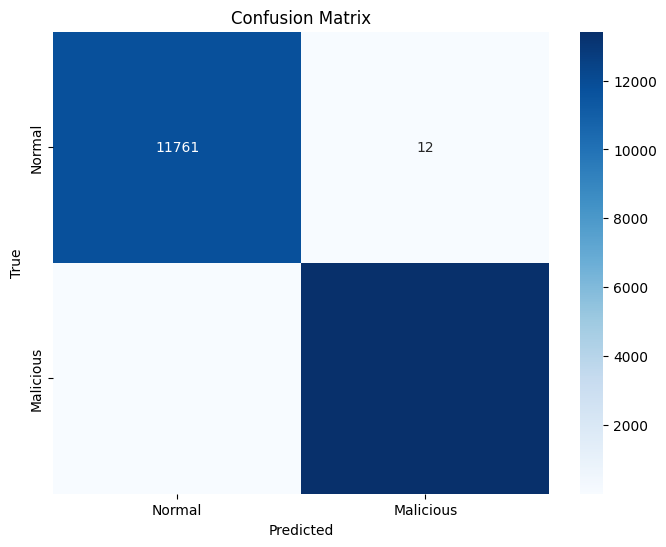

In [50]:
# Compute confusion matrix
cm = confusion_matrix(y_train_test, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Malicious'], 
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
accuracy = accuracy_score(y_train_test, pred)
precision = precision_score(y_train_test, pred)
recall = recall_score(y_train_test, pred)
f1 = f1_score(y_train_test, pred)

print("Accuracy:   {:.2%}".format(accuracy))
print("Precision:  {:.2%}".format(precision))
print("Recall:     {:.2%}".format(recall))
print("F1-score:   {:.2%}".format(f1))

Accuracy:   99.94%
Precision:  99.91%
Recall:     99.98%
F1-score:   99.94%


## with Test Dataset

In [60]:
pred_test = model.predict(X_test)

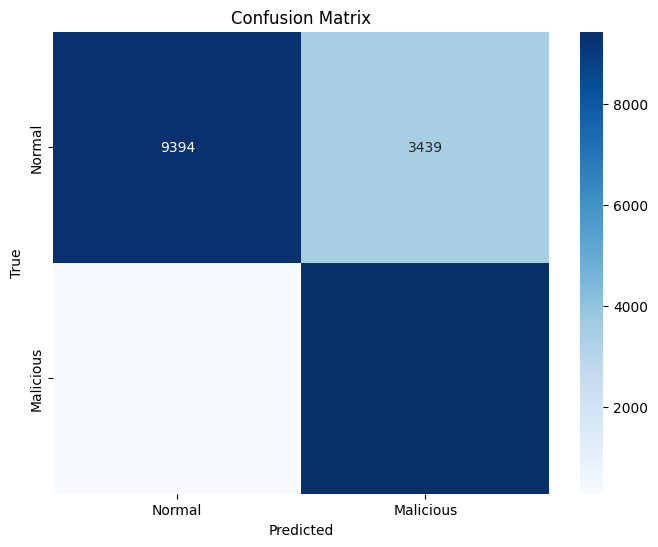

In [61]:
# Compute confusion matrix
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Malicious'], 
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [62]:
# Compute accuracy
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print("Accuracy:   {:.2%}".format(accuracy))
print("Precision:  {:.2%}".format(precision))
print("Recall:     {:.2%}".format(recall))
print("F1-score:   {:.2%}".format(f1))

Accuracy:   83.52%
Precision:  73.29%
Recall:     97.16%
F1-score:   83.55%


## 6.1 HYPERPARAMETER TUNING

In [63]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [64]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [65]:
XGB_grid_model.best_score_

0.9995641041936189

In [66]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

## 6.2 FINAL MODEL

In [68]:
XGB_model = XGBClassifier(
colsample_bytree=0.5,
 learning_rate=0.1,
 max_depth=6,
 n_estimators=128,
 subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 6.3 EVALUATION

In [71]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

In [72]:
xgb_auc

0.9804657933855155

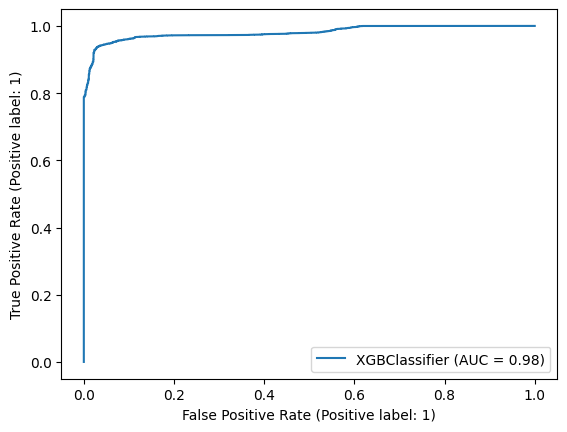

In [73]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

In [74]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [77]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[9391 3442]
 [ 267 9444]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     12833
           1       0.73      0.97      0.84      9711

    accuracy                           0.84     22544
   macro avg       0.85      0.85      0.84     22544
weighted avg       0.87      0.84      0.84     22544


Train_Set
[[46853     4]
 [    6 53915]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46857
           1       1.00      1.00      1.00     53921

    accuracy                           1.00    100778
   macro avg       1.00      1.00      1.00    100778
weighted avg       1.00      1.00      1.00    100778



## 7. FEATURE IMPORTANCE

In [85]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X_train.columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
src_bytes,0.190609
dst_bytes,0.165251
flag,0.122325
same_srv_rate,0.108315
protocol_type,0.058190
level,0.039826
num_compromised,0.034394
count,0.034152
logged_in,0.027093
diff_srv_rate,0.025836


In [86]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

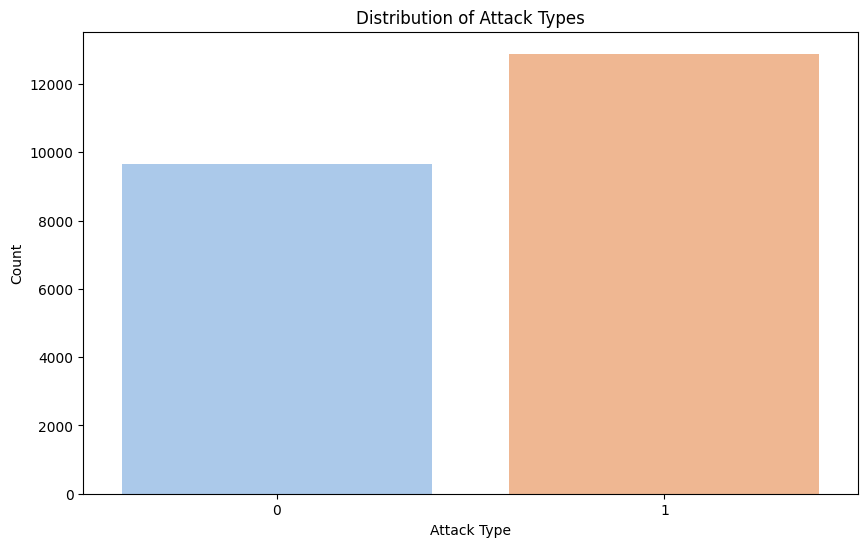

In [91]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()